In [36]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# import datetime
from datetime import datetime

/Users/ericfesta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


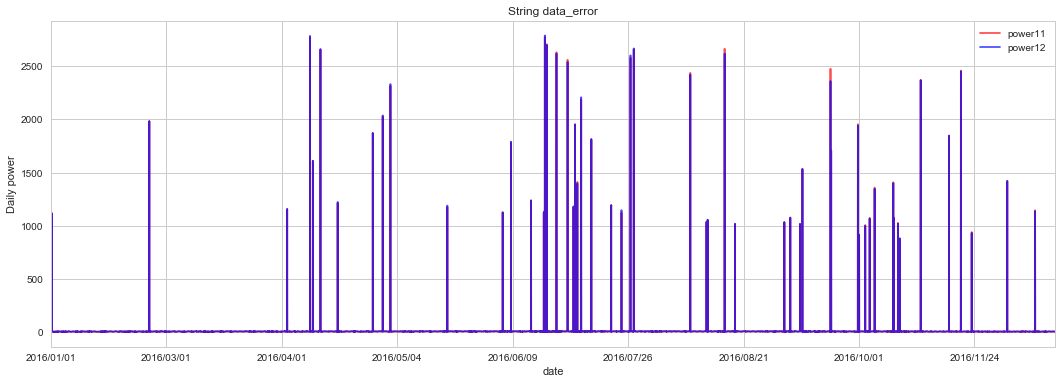

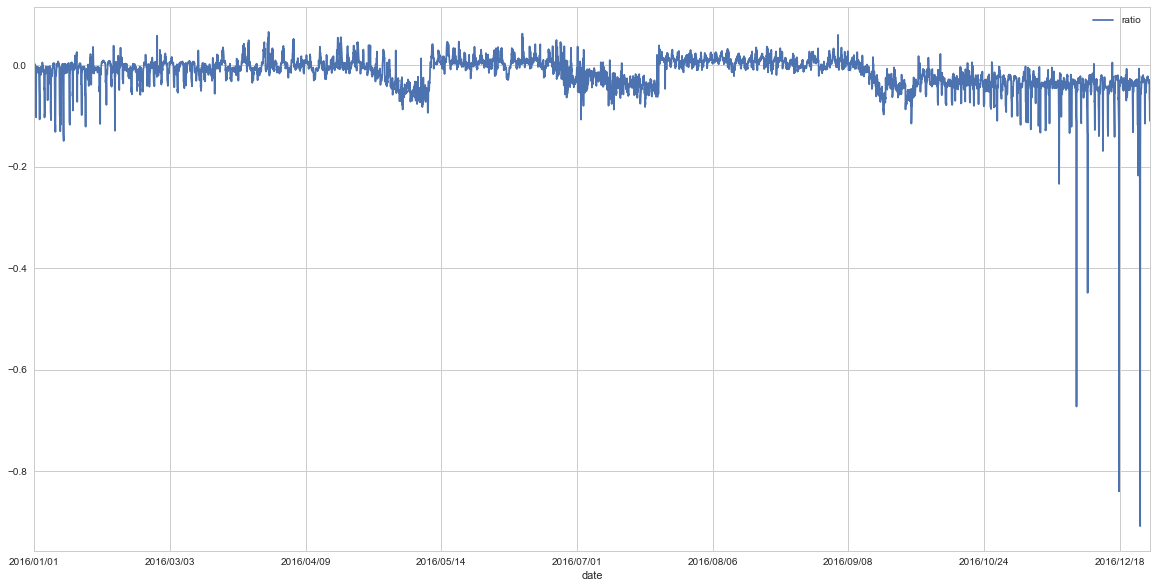

In [37]:
from datetime import datetime

string_data = pd.read_csv('string_data_all.csv', encoding="shift-jis")
string_data2 = string_data.rename(columns={"計測日時": "created", "ストリング11の電力(W)": "power11", "ストリング12の電力(W)": "power12"})
string_data3 = string_data2.ix[:,['created', 'power11', 'power12']]#行指定なし、列（横）を指定
string_data4 = string_data3.dropna()#欠損値を含む　Row（タテ）を除く

dates = []
for created_time in string_data4.created:
    date = datetime.strptime(created_time, '%Y/%m/%d').strftime('%Y/%m/%d')
#     date2 = date.replace('/', '')
#     date3 = int(date2)
#     dates.append(date3)
    dates.append(date)
    
string_data4['date'] = dates
string_data5 = string_data4.drop('created', axis = 1)#createdをdateに変更したので消す
# string_data6 = string_data5.groupby('date').sum()#集計
string_data6 = string_data5.set_index(['date'])

string_data6['ratio'] = (string_data6['power12'] / string_data6['power11'])- 1#１１が正解データ
# string_data6['error'] = (string_data6['power12'] - string_data6['power11'])#１１が正解データ

string_data7 = string_data6.drop(['power11', 'power12'], axis = 1).dropna()#String６を消す
string_data8 = string_data7.replace(0.0, np.nan) #0をnanに置き換え
string_data9 = string_data8.dropna() #Nanを取り除く

colorlist = ['#FF0000', '#0000FF']
string_data6.plot( y=['power11', 'power12'], figsize=(18,6), alpha=0.7, color=colorlist)
plt.ylabel("Daily power") 
plt.title("String data_error")

# string_data7.plot( y=['error'], figsize=(28, 10), alpha=1)
string_data9.plot( y=['ratio'], figsize=(20, 10), alpha=1)

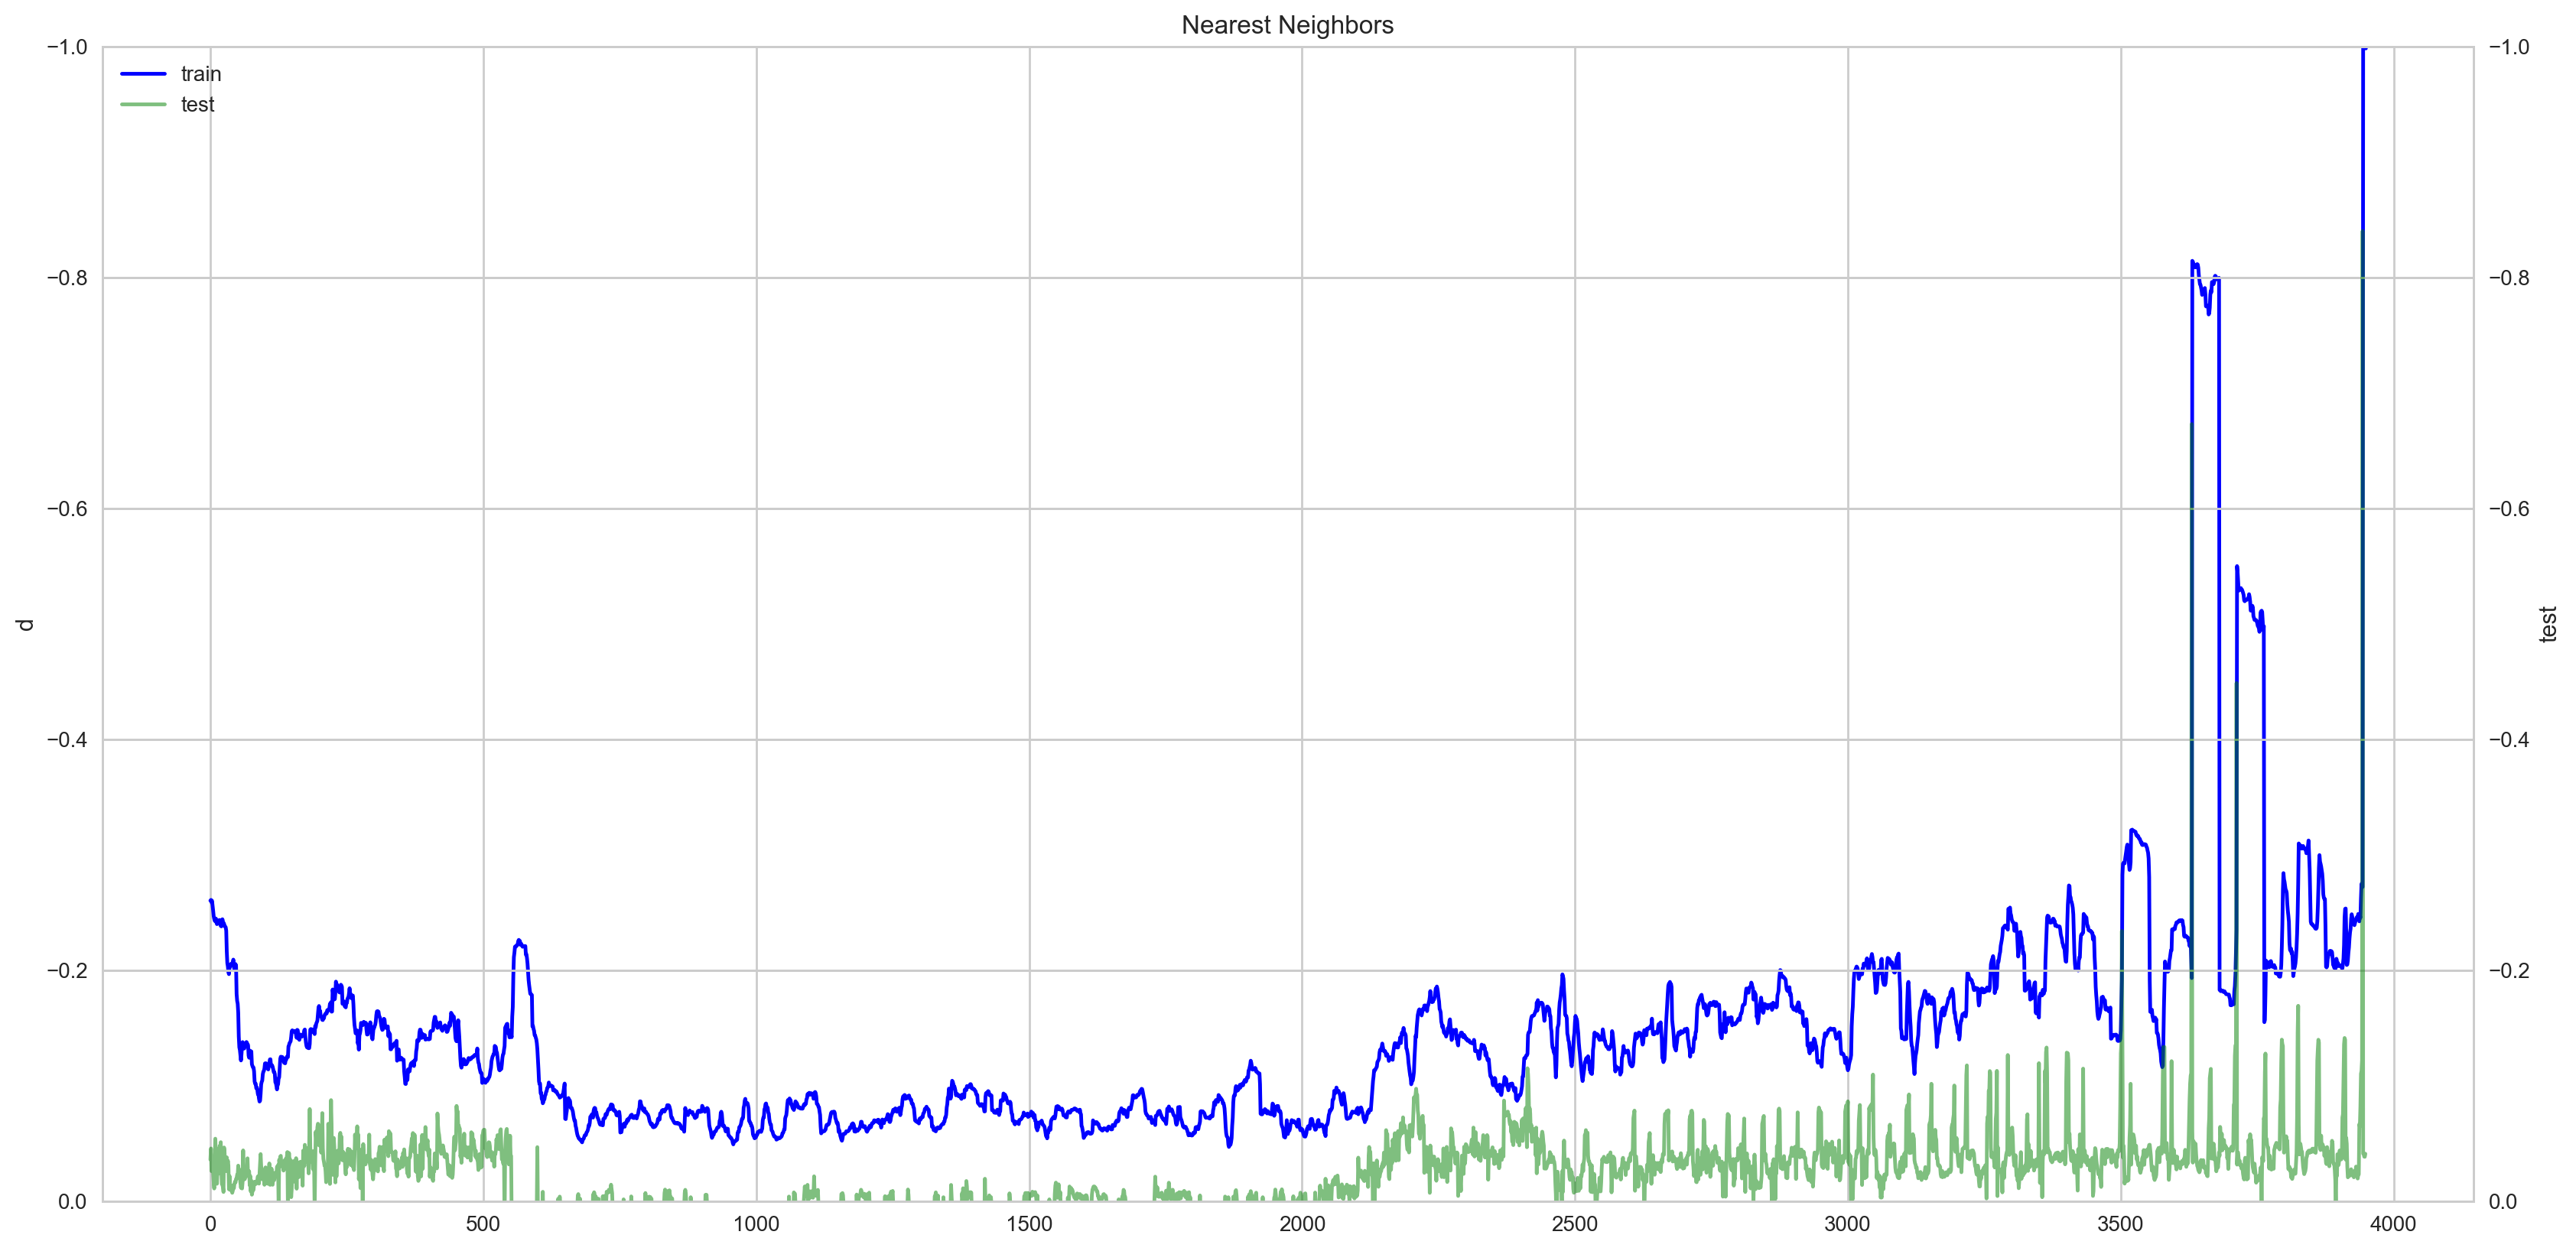

In [97]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from pylab import *
from matplotlib import font_manager

#日本語使いたい場合
fontprop = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")

# def main():
#     data = string_data9.values#numpyに変換
#     train_data = data[1:4000] 
#     test_data = data[4001:8000]#１１=正解data

#     width = 100
#     nk = 1

#     train = embed(train_data, width)
#     test = embed(test_data, width)

#     neigh = NearestNeighbors(n_neighbors=nk)
#     neigh.fit(train)
#     d = neigh.kneighbors(test)[0]#謎の[0]
#     # 距離をmax1にするデータ整形
#     mx = np.max(d)
#     d = d / mx
#     # プロット  
#     test_for_plot = data[4001+width:8000]
#     fig = plt.figure(figsize=(20,10), dpi=200)
#     ax1 = fig.add_subplot(1,1,1)
#     ax2 = ax1.twinx()

#     p1, =ax1.plot(d, '-b', alpha=1.0)
#     ax1.set_ylabel('train')
#     p2, =ax2.plot(test_for_plot, '-g', alpha=0.5)

#     ax2.set_ylabel('test')
#     ax2.set_ylim(0,-0.8)
#     plt.title("Nearest Neighbors")
#     ax1.legend([p1, p2], ['train','test'])
#     plt.show()
    
def embed(lst, dim):
    emb = np.empty((0,dim), float) 
    for i in range(lst.size - dim + 1): 
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) 
        emb = np.append( emb, tmp, axis=0)
    return emb

# if __name__ == '__main__':
    # main()

data = string_data9.values#numpyに変換
train_data = data[1:4000] 
test_data = data[4001:8000]#１１=正解data

width = 50
nk = 1

train = embed(train_data, width)
test = embed(test_data, width)

neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]#謎の[0]
# 距離をmax1にするデータ整形
mx = np.max(d)
d = -d / mx
# プロット  
test_for_plot = data[4001+width:8000]
fig = plt.figure(figsize=(20,10), dpi=200)
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

p1, =ax1.plot(d, '-b', alpha=1.0)
ax1.set_ylabel('d')
ax1.set_ylim(0,-1.0)
p2, =ax2.plot(test_for_plot, '-g', alpha=0.5)

ax2.set_ylabel('test')
ax2.set_ylim(0,-1.0)
plt.title("Nearest Neighbors")
ax1.legend([p1, p2], ['train','test'])
plt.show()

In [82]:
#test_for_plot = data[4001+width:8000]

string_data10=string_data9['ratio'].values
print(float(string_data10[0:1]))
# print(string_data9.values)
len(string_data10)
d[0:1]

-0.009569377990430672


array([[-0.26012434]])

In [91]:
for i in range(len(string_data10)):
    ratio = float(string_data10[i: i +1])
    distance = d[i: i + 1]
    print(string_data9[i: i + 1])

               ratio
date                
2016/01/01 -0.009569
               ratio
date                
2016/01/01 -0.004082
               ratio
date                
2016/01/01 -0.006969
               ratio
date                
2016/01/01 -0.004587
               ratio
date                
2016/01/01 -0.008264
               ratio
date                
2016/01/01 -0.009709
               ratio
date                
2016/01/01 -0.003568
               ratio
date                
2016/01/01 -0.002174
               ratio
date                
2016/01/01  0.001984
               ratio
date                
2016/01/01 -0.003067
               ratio
date                
2016/01/01 -0.004785
               ratio
date                
2016/01/01 -0.032746
               ratio
date                
2016/01/01 -0.042945
               ratio
date                
2016/01/01 -0.062687
               ratio
date                
2016/01/01 -0.092308
               ratio
date                
2016/01/01 -0

2016/01/16 -0.104247
            ratio
date             
2016/01/16  -0.13
              ratio
date               
2016/01/18 -0.00641
               ratio
date                
2016/01/18 -0.018519
               ratio
date                
2016/01/18 -0.004425
              ratio
date               
2016/01/18 -0.00363
               ratio
date                
2016/01/18 -0.116883
               ratio
date                
2016/01/19 -0.081633
               ratio
date                
2016/01/20 -0.008403
               ratio
date                
2016/01/20 -0.011494
               ratio
date                
2016/01/20 -0.016598
              ratio
date               
2016/01/20 -0.00905
               ratio
date                
2016/01/20 -0.009479
               ratio
date                
2016/01/20 -0.007968
              ratio
date               
2016/01/20 -0.00703
               ratio
date                
2016/01/20 -0.020979
               ratio
date                
2016/01/20 -0

               ratio
date                
2016/02/07 -0.025126
               ratio
date                
2016/02/07 -0.007937
               ratio
date                
2016/02/07 -0.015385
             ratio
date              
2016/02/07 -0.0075
               ratio
date                
2016/02/07 -0.003373
               ratio
date                
2016/02/07  0.014652
               ratio
date                
2016/02/07 -0.010363
               ratio
date                
2016/02/07 -0.001567
               ratio
date                
2016/02/07  0.006299
               ratio
date                
2016/02/07  0.022258
               ratio
date                
2016/02/07 -0.013423
              ratio
date               
2016/02/07 -0.00495
               ratio
date                
2016/02/07 -0.011111
               ratio
date                
2016/02/07  0.004158
               ratio
date                
2016/02/08 -0.038168
               ratio
date                
2016/02/08 -0.005391
 

2016/02/15 -0.006897
               ratio
date                
2016/02/15 -0.013699
               ratio
date                
2016/02/15 -0.012048
               ratio
date                
2016/02/15 -0.007194
               ratio
date                
2016/02/15 -0.008197
             ratio
date              
2016/02/15 -0.0189
               ratio
date                
2016/02/15 -0.032877
               ratio
date                
2016/02/16 -0.086957
               ratio
date                
2016/02/16 -0.129032
               ratio
date                
2016/02/16 -0.004082
               ratio
date                
2016/02/16 -0.023121
               ratio
date                
2016/02/16 -0.020101
               ratio
date                
2016/02/16 -0.007547
               ratio
date                
2016/02/16 -0.009677
               ratio
date                
2016/02/16  0.007105
               ratio
date                
2016/02/16  0.005155
               ratio
date               

               ratio
date                
2016/02/23 -0.024055
               ratio
date                
2016/02/23 -0.039344
               ratio
date                
2016/02/23 -0.050725
               ratio
date                
2016/02/23 -0.039033
              ratio
date               
2016/02/23 -0.03599
               ratio
date                
2016/02/23 -0.042169
               ratio
date                
2016/02/24 -0.012821
               ratio
date                
2016/02/24 -0.011111
               ratio
date                
2016/02/24 -0.016447
               ratio
date                
2016/02/24 -0.011396
               ratio
date                
2016/02/24 -0.007326
               ratio
date                
2016/02/24 -0.011236
               ratio
date                
2016/02/24 -0.012085
               ratio
date                
2016/02/24 -0.027523
               ratio
date                
2016/02/24 -0.027826
               ratio
date                
2016/02/24 -0.02

               ratio
date                
2016/03/01  0.021505
               ratio
date                
2016/03/01 -0.003984
               ratio
date                
2016/03/01 -0.012295
               ratio
date                
2016/03/01 -0.014354
               ratio
date                
2016/03/01 -0.014634
               ratio
date                
2016/03/01  0.007207
               ratio
date                
2016/03/01  0.020761
               ratio
date                
2016/03/01 -0.003226
               ratio
date                
2016/03/01 -0.005464
               ratio
date                
2016/03/01 -0.036329
               ratio
date                
2016/03/01 -0.038076
               ratio
date                
2016/03/01 -0.029289
               ratio
date                
2016/03/01 -0.031042
               ratio
date                
2016/03/01 -0.033735
               ratio
date                
2016/03/01 -0.027174
               ratio
date                
2016/03/02 -0

2016/03/05  0.00363
               ratio
date                
2016/03/05  0.005319
               ratio
date                
2016/03/05  0.005102
               ratio
date                
2016/03/05  0.003252
               ratio
date                
2016/03/05  0.006329
               ratio
date                
2016/03/05  0.004666
               ratio
date                
2016/03/05  0.004525
               ratio
date                
2016/03/05  0.004491
               ratio
date                
2016/03/05  0.004478
               ratio
date                
2016/03/05  0.004418
               ratio
date                
2016/03/05  0.004399
               ratio
date                
2016/03/05  0.004418
               ratio
date                
2016/03/05  0.002915
               ratio
date                
2016/03/05  0.004373
               ratio
date                
2016/03/05  0.005891
               ratio
date                
2016/03/05  0.005917
               ratio
date          

2016/03/13  0.003125
               ratio
date                
2016/03/13 -0.003205
               ratio
date                
2016/03/13 -0.004739
               ratio
date                
2016/03/14 -0.004444
              ratio
date               
2016/03/14 -0.00813
               ratio
date                
2016/03/14 -0.007557
               ratio
date                
2016/03/14 -0.007246
              ratio
date               
2016/03/14 -0.00597
               ratio
date                
2016/03/14 -0.005769
               ratio
date                
2016/03/14 -0.012048
               ratio
date                
2016/03/14 -0.001664
               ratio
date                
2016/03/14 -0.011194
               ratio
date                
2016/03/14 -0.012862
               ratio
date                
2016/03/14 -0.013699
               ratio
date                
2016/03/14 -0.011215
               ratio
date                
2016/03/14 -0.007605
             ratio
date              
20

               ratio
date                
2016/03/17  0.005714
               ratio
date                
2016/03/17  0.007342
               ratio
date                
2016/03/17  0.007576
               ratio
date                
2016/03/17  0.004777
               ratio
date                
2016/03/17  0.005025
              ratio
date               
2016/03/17  0.00692
               ratio
date                
2016/03/17  0.008977
               ratio
date                
2016/03/17  0.005671
               ratio
date                
2016/03/17  0.003976
               ratio
date                
2016/03/17  0.004228
               ratio
date                
2016/03/19 -0.010753
              ratio
date               
2016/03/19 -0.00625
               ratio
date                
2016/03/19 -0.030195
               ratio
date                
2016/03/19 -0.016234
               ratio
date                
2016/03/19 -0.022088
               ratio
date                
2016/03/19 -0.01136

               ratio
date                
2016/03/23  0.017685
               ratio
date                
2016/03/23  0.005277
               ratio
date                
2016/03/23  0.011667
               ratio
date                
2016/03/23  0.001353
               ratio
date                
2016/03/23  0.043551
               ratio
date                
2016/03/23  0.030405
               ratio
date                
2016/03/23  0.006912
               ratio
date                
2016/03/23  0.005199
               ratio
date                
2016/03/23  0.049285
               ratio
date                
2016/03/23  0.038402
               ratio
date                
2016/03/23  0.004823
               ratio
date                
2016/03/23  0.005076
              ratio
date               
2016/03/23  0.00431
               ratio
date                
2016/03/23  0.002268
               ratio
date                
2016/03/23 -0.003067
               ratio
date                
2016/03/23 -0.00

               ratio
date                
2016/03/27  0.044046
               ratio
date                
2016/03/27  0.032423
               ratio
date                
2016/03/27  0.053659
               ratio
date                
2016/03/27  0.043062
               ratio
date                
2016/03/27  0.027869
               ratio
date                
2016/03/27  0.043269
               ratio
date                
2016/03/27  0.056543
               ratio
date                
2016/03/27  0.065811
               ratio
date                
2016/03/27  0.062102
               ratio
date                
2016/03/27 -0.003906
               ratio
date                
2016/03/27  0.023451
               ratio
date                
2016/03/27 -0.003597
               ratio
date                
2016/03/27 -0.003436
               ratio
date                
2016/03/28 -0.020305
               ratio
date                
2016/03/28 -0.008734
               ratio
date                
2016/03/28 -0

2016/04/05 -0.00346
               ratio
date                
2016/04/05 -0.009259
               ratio
date                
2016/04/06 -0.004587
               ratio
date                
2016/04/06 -0.004444
               ratio
date                
2016/04/06 -0.003861
               ratio
date                
2016/04/06 -0.003984
               ratio
date                
2016/04/06 -0.007273
               ratio
date                
2016/04/06 -0.004525
               ratio
date                
2016/04/06 -0.004396
               ratio
date                
2016/04/06 -0.006316
               ratio
date                
2016/04/06 -0.005376
               ratio
date                
2016/04/06  0.006814
              ratio
date               
2016/04/06  0.00339
             ratio
date              
2016/04/06  0.0067
              ratio
date               
2016/04/06  0.00774
               ratio
date                
2016/04/06  0.004739
               ratio
date                
2016/

               ratio
date                
2016/04/11 -0.009685
            ratio
date             
2016/04/12  -0.01
               ratio
date                
2016/04/12 -0.007092
               ratio
date                
2016/04/12 -0.011494
               ratio
date                
2016/04/12 -0.009231
               ratio
date                
2016/04/12 -0.008596
               ratio
date                
2016/04/12 -0.007576
               ratio
date                
2016/04/12 -0.009772
              ratio
date               
2016/04/12 -0.00639
               ratio
date                
2016/04/12 -0.006711
               ratio
date                
2016/04/12 -0.001949
               ratio
date                
2016/04/12  0.009479
               ratio
date                
2016/04/12  0.003839
               ratio
date                
2016/04/12 -0.001761
               ratio
date                
2016/04/12 -0.002299
               ratio
date                
2016/04/12 -0.004777
    

               ratio
date                
2016/04/16  0.048632
               ratio
date                
2016/04/16  0.054545
               ratio
date                
2016/04/16  0.005964
               ratio
date                
2016/04/16  0.001992
               ratio
date                
2016/04/16 -0.006515
               ratio
date                
2016/04/16 -0.003086
               ratio
date                
2016/04/16 -0.002451
               ratio
date                
2016/04/16 -0.002915
               ratio
date                
2016/04/16 -0.003195
               ratio
date                
2016/04/16 -0.003058
               ratio
date                
2016/04/16  0.002232
               ratio
date                
2016/04/16  0.009076
               ratio
date                
2016/04/17  0.002597
               ratio
date                
2016/04/17  0.004454
               ratio
date                
2016/04/17 -0.007843
               ratio
date                
2016/04/17  0

2016/04/25 -0.007389
               ratio
date                
2016/04/25 -0.004149
               ratio
date                
2016/04/25 -0.008475
               ratio
date                
2016/04/25 -0.003125
               ratio
date                
2016/04/25 -0.002778
               ratio
date                
2016/04/25 -0.002933
               ratio
date                
2016/04/25 -0.006061
               ratio
date                
2016/04/25 -0.002632
              ratio
date               
2016/04/25 -0.00551
               ratio
date                
2016/04/25 -0.007595
               ratio
date                
2016/04/25 -0.003766
               ratio
date                
2016/04/25 -0.003968
              ratio
date               
2016/04/25 -0.00198
               ratio
date                
2016/04/25  0.001805
               ratio
date                
2016/04/25  0.004651
               ratio
date                
2016/04/25 -0.002695
               ratio
date               

               ratio
date                
2016/05/01 -0.040073
               ratio
date                
2016/05/01 -0.037594
               ratio
date                
2016/05/01 -0.038076
               ratio
date                
2016/05/01 -0.027484
               ratio
date                
2016/05/01 -0.024831
              ratio
date               
2016/05/01 -0.02619
               ratio
date                
2016/05/02 -0.058065
               ratio
date                
2016/05/02 -0.052941
               ratio
date                
2016/05/02 -0.048128
               ratio
date                
2016/05/02 -0.041543
               ratio
date                
2016/05/02 -0.048485
              ratio
date               
2016/05/02 -0.04893
               ratio
date                
2016/05/02 -0.047368
               ratio
date                
2016/05/02 -0.046316
               ratio
date                
2016/05/02 -0.047718
               ratio
date                
2016/05/02 -0.03854

               ratio
date                
2016/05/11 -0.060484
               ratio
date                
2016/05/11 -0.067278
               ratio
date                
2016/05/11 -0.082317
               ratio
date                
2016/05/11 -0.062954
               ratio
date                
2016/05/11 -0.062718
             ratio
date              
2016/05/11 -0.0681
               ratio
date                
2016/05/11 -0.064516
               ratio
date                
2016/05/11 -0.076923
               ratio
date                
2016/05/11 -0.050602
               ratio
date                
2016/05/11 -0.024348
               ratio
date                
2016/05/12 -0.068241
               ratio
date                
2016/05/12 -0.062802
               ratio
date                
2016/05/12 -0.067873
               ratio
date                
2016/05/12 -0.061311
               ratio
date                
2016/05/12 -0.065347
               ratio
date                
2016/05/12 -0.06156

2016/05/17  0.02171
               ratio
date                
2016/05/17  0.015027
               ratio
date                
2016/05/17  0.009602
               ratio
date                
2016/05/17  0.006993
               ratio
date                
2016/05/17  0.007205
               ratio
date                
2016/05/17  0.004431
               ratio
date                
2016/05/17  0.009188
               ratio
date                
2016/05/17 -0.001681
               ratio
date                
2016/05/17 -0.005245
               ratio
date                
2016/05/17 -0.005505
               ratio
date                
2016/05/17 -0.007722
               ratio
date                
2016/05/17 -0.008214
               ratio
date                
2016/05/17 -0.006494
               ratio
date                
2016/05/18 -0.002268
               ratio
date                
2016/05/18  0.002283
              ratio
date               
2016/05/18  0.00404
               ratio
date             

               ratio
date                
2016/05/22  0.023066
              ratio
date               
2016/05/22  0.00436
              ratio
date               
2016/05/22  0.00436
               ratio
date                
2016/05/22  0.018466
               ratio
date                
2016/05/22  0.004573
               ratio
date                
2016/05/22  0.002849
               ratio
date                
2016/05/22  0.001504
               ratio
date                
2016/05/22  0.002747
              ratio
date               
2016/05/22  0.01511
               ratio
date                
2016/05/22  0.002841
               ratio
date                
2016/05/22  0.007257
               ratio
date                
2016/05/22  0.006024
               ratio
date                
2016/05/22  0.007246
              ratio
date               
2016/05/22  0.00317
               ratio
date                
2016/05/22 -0.003322
               ratio
date                
2016/05/22 -0.005714
    

2016/05/30 -0.01312
               ratio
date                
2016/05/30 -0.019231
               ratio
date                
2016/05/30  0.033724
               ratio
date                
2016/05/30 -0.015919
               ratio
date                
2016/05/30 -0.011364
              ratio
date               
2016/05/30 -0.00554
               ratio
date                
2016/05/30 -0.004231
               ratio
date                
2016/05/30 -0.004304
               ratio
date                
2016/05/30 -0.002959
               ratio
date                
2016/05/30 -0.003053
               ratio
date                
2016/05/30 -0.006525
              ratio
date               
2016/05/30 -0.00678
               ratio
date                
2016/05/30 -0.003552
               ratio
date                
2016/05/30 -0.005525
               ratio
date                
2016/05/30 -0.005837
               ratio
date                
2016/05/30 -0.004184
               ratio
date                

2016/06/03  0.009141
               ratio
date                
2016/06/03  0.007921
               ratio
date                
2016/06/03  0.008316
               ratio
date                
2016/06/03  0.008475
               ratio
date                
2016/06/04 -0.004082
               ratio
date                
2016/06/05 -0.004566
               ratio
date                
2016/06/05 -0.004065
               ratio
date                
2016/06/05 -0.003559
              ratio
date               
2016/06/05 -0.00346
               ratio
date                
2016/06/05 -0.007326
               ratio
date                
2016/06/06  0.003125
               ratio
date                
2016/06/06  0.007463
               ratio
date                
2016/06/06  0.008961
               ratio
date                
2016/06/06  0.006944
               ratio
date                
2016/06/06  0.005618
               ratio
date                
2016/06/06  0.003003
               ratio
date            

               ratio
date                
2016/06/10  0.041494
               ratio
date                
2016/06/10  0.028767
               ratio
date                
2016/06/10  0.017808
              ratio
date               
2016/06/10  0.02332
               ratio
date                
2016/06/10  0.015089
               ratio
date                
2016/06/10  0.014966
               ratio
date                
2016/06/10  0.012346
               ratio
date                
2016/06/10  0.009682
               ratio
date                
2016/06/10  0.008475
               ratio
date                
2016/06/10  0.008621
               ratio
date                
2016/06/10  0.015361
               ratio
date                
2016/06/10  0.015699
               ratio
date                
2016/06/10  0.011345
               ratio
date                
2016/06/10  0.011725
               ratio
date                
2016/06/10  0.012195
              ratio
date               
2016/06/10  0.0108

              ratio
date               
2016/06/17 -0.02719
               ratio
date                
2016/06/17 -0.012442
               ratio
date                
2016/06/17 -0.014749
               ratio
date                
2016/06/17 -0.017812
               ratio
date                
2016/06/17  0.035874
               ratio
date                
2016/06/17 -0.011696
               ratio
date                
2016/06/17 -0.022409
               ratio
date                
2016/06/17  0.018293
               ratio
date                
2016/06/17 -0.013917
               ratio
date                
2016/06/17 -0.012968
             ratio
date              
2016/06/17  0.0053
               ratio
date                
2016/06/17 -0.015152
               ratio
date                
2016/06/18 -0.015424
               ratio
date                
2016/06/18 -0.008403
               ratio
date                
2016/06/18 -0.018832
               ratio
date                
2016/06/18 -0.013462
 

              ratio
date               
2016/07/01 -0.03481
               ratio
date                
2016/07/01 -0.035052
              ratio
date               
2016/07/01 -0.03663
               ratio
date                
2016/07/02 -0.034268
               ratio
date                
2016/07/02 -0.053681
               ratio
date                
2016/07/02 -0.034074
               ratio
date                
2016/07/02 -0.003591
               ratio
date                
2016/07/02 -0.010169
               ratio
date                
2016/07/02 -0.009346
               ratio
date                
2016/07/02  0.007764
               ratio
date                
2016/07/02  0.006431
               ratio
date                
2016/07/02 -0.005474
               ratio
date                
2016/07/02 -0.054487
               ratio
date                
2016/07/02 -0.053712
               ratio
date                
2016/07/02 -0.009195
               ratio
date                
2016/07/02 -0.00456

2016/07/07 -0.014041
               ratio
date                
2016/07/07 -0.018762
               ratio
date                
2016/07/07 -0.024209
               ratio
date                
2016/07/07 -0.018106
               ratio
date                
2016/07/07 -0.021488
               ratio
date                
2016/07/07 -0.024436
               ratio
date                
2016/07/07 -0.022403
               ratio
date                
2016/07/07 -0.022822
               ratio
date                
2016/07/07 -0.029644
            ratio
date             
2016/07/07  -0.03
               ratio
date                
2016/07/07 -0.031056
               ratio
date                
2016/07/07  0.005957
               ratio
date                
2016/07/07 -0.035599
               ratio
date                
2016/07/07 -0.033639
               ratio
date                
2016/07/07 -0.038462
               ratio
date                
2016/07/07 -0.039088
              ratio
date               
201

2016/07/17 -0.047516
               ratio
date                
2016/07/17 -0.057441
               ratio
date                
2016/07/17 -0.018735
               ratio
date                
2016/07/17 -0.026604
               ratio
date                
2016/07/17 -0.025253
               ratio
date                
2016/07/17 -0.011111
               ratio
date                
2016/07/18 -0.034483
               ratio
date                
2016/07/18 -0.044601
               ratio
date                
2016/07/18 -0.039046
               ratio
date                
2016/07/18  0.004425
               ratio
date                
2016/07/18 -0.049242
               ratio
date                
2016/07/18 -0.039256
               ratio
date                
2016/07/18 -0.035514
               ratio
date                
2016/07/18 -0.035865
               ratio
date                
2016/07/18 -0.031627
               ratio
date                
2016/07/18 -0.033435
               ratio
date         

2016/07/22 -0.046843
               ratio
date                
2016/07/22 -0.043197
               ratio
date                
2016/07/22 -0.040816
               ratio
date                
2016/07/22 -0.042254
               ratio
date                
2016/07/22 -0.046429
               ratio
date                
2016/07/22 -0.048093
               ratio
date                
2016/07/22 -0.045455
               ratio
date                
2016/07/22 -0.042836
              ratio
date               
2016/07/22 -0.03819
              ratio
date               
2016/07/22 -0.04039
               ratio
date                
2016/07/22 -0.037815
               ratio
date                
2016/07/22 -0.038822
               ratio
date                
2016/07/22 -0.040373
               ratio
date                
2016/07/22 -0.034759
              ratio
date               
2016/07/22 -0.02815
               ratio
date                
2016/07/22 -0.022788
               ratio
date                
2

               ratio
date                
2016/07/26  0.003155
               ratio
date                
2016/07/26  0.009225
               ratio
date                
2016/07/26  0.007899
               ratio
date                
2016/07/26  0.013636
               ratio
date                
2016/07/26  0.011594
              ratio
date               
2016/07/26  0.01105
               ratio
date                
2016/07/26  0.011065
               ratio
date                
2016/07/26  0.009957
               ratio
date                
2016/07/26  0.011628
               ratio
date                
2016/07/26  0.020896
              ratio
date               
2016/07/26  0.01355
               ratio
date                
2016/07/26  0.020298
               ratio
date                
2016/07/26  0.016349
               ratio
date                
2016/07/26  0.026918
               ratio
date                
2016/07/26  0.017906
               ratio
date                
2016/07/26  0.01759

2016/07/29  0.022942
               ratio
date                
2016/07/29  0.014225
               ratio
date                
2016/07/29  0.025503
               ratio
date                
2016/07/29  0.015027
               ratio
date                
2016/07/29  0.019391
               ratio
date                
2016/07/29  0.028226
               ratio
date                
2016/07/29 -0.005533
               ratio
date                
2016/07/29 -0.001377
               ratio
date                
2016/07/29 -0.007533
               ratio
date                
2016/07/29 -0.005128
               ratio
date                
2016/07/29 -0.002004
               ratio
date                
2016/07/29 -0.003984
               ratio
date                
2016/07/30  0.004762
               ratio
date                
2016/07/30  0.008658
               ratio
date                
2016/07/30  0.002024
               ratio
date                
2016/07/30  0.005736
               ratio
date         

               ratio
date                
2016/08/03  0.010949
              ratio
date               
2016/08/03  0.01083
               ratio
date                
2016/08/03  0.013624
               ratio
date                
2016/08/03  0.025676
               ratio
date                
2016/08/03  0.024457
               ratio
date                
2016/08/03  0.016371
               ratio
date                
2016/08/03  0.018843
               ratio
date                
2016/08/03  0.010823
               ratio
date                
2016/08/03  0.011348
               ratio
date                
2016/08/03  0.004444
               ratio
date                
2016/08/03 -0.007067
               ratio
date                
2016/08/03 -0.009615
               ratio
date                
2016/08/03 -0.006667
               ratio
date                
2016/08/04  0.002985
               ratio
date                
2016/08/04  0.002681
              ratio
date               
2016/08/04  0.0065

2016/08/07  0.011925
            ratio
date             
2016/08/07  0.004
               ratio
date                
2016/08/07  0.002146
               ratio
date                
2016/08/08  0.008287
               ratio
date                
2016/08/08  0.004914
               ratio
date                
2016/08/08  0.009195
               ratio
date                
2016/08/08  0.010183
               ratio
date                
2016/08/08  0.011516
               ratio
date                
2016/08/08  0.014815
               ratio
date                
2016/08/08  0.014787
               ratio
date                
2016/08/08  0.012411
               ratio
date                
2016/08/08  0.013559
               ratio
date                
2016/08/08  0.008446
               ratio
date                
2016/08/08  0.009042
               ratio
date                
2016/08/08  0.012121
               ratio
date                
2016/08/08  0.013678
               ratio
date                
2

               ratio
date                
2016/08/12  0.009986
             ratio
date              
2016/08/12  0.0125
               ratio
date                
2016/08/12  0.014966
               ratio
date                
2016/08/12  0.012295
               ratio
date                
2016/08/12  0.015089
               ratio
date                
2016/08/12  0.015048
               ratio
date                
2016/08/12  0.006878
               ratio
date                
2016/08/12  0.013624
               ratio
date                
2016/08/12  0.013595
               ratio
date                
2016/08/12  0.012448
              ratio
date               
2016/08/12  0.01776
               ratio
date                
2016/08/12  0.006897
               ratio
date                
2016/08/12  0.020492
               ratio
date                
2016/08/12  0.008242
               ratio
date                
2016/08/12 -0.004149
               ratio
date                
2016/08/12  0.017784
 

               ratio
date                
2016/08/18  0.009868
               ratio
date                
2016/08/18  0.008157
               ratio
date                
2016/08/18  0.015674
               ratio
date                
2016/08/18  0.010622
               ratio
date                
2016/08/18  0.010279
               ratio
date                
2016/08/18  0.011478
               ratio
date                
2016/08/18  0.010959
              ratio
date               
2016/08/18  0.01238
               ratio
date                
2016/08/18  0.013587
               ratio
date                
2016/08/18  0.018919
               ratio
date                
2016/08/18  0.023256
               ratio
date                
2016/08/18  0.021828
               ratio
date                
2016/08/18  0.027285
               ratio
date                
2016/08/18  0.020548
               ratio
date                
2016/08/18  0.011142
               ratio
date                
2016/08/18 -0.01

               ratio
date                
2016/08/22  0.010471
               ratio
date                
2016/08/22  0.007335
               ratio
date                
2016/08/22  0.009153
               ratio
date                
2016/08/22  0.010776
               ratio
date                
2016/08/22  0.008197
               ratio
date                
2016/08/22  0.003883
               ratio
date                
2016/08/22  0.012987
               ratio
date                
2016/08/22  0.014109
               ratio
date                
2016/08/22  0.010067
               ratio
date                
2016/08/22  0.015898
               ratio
date                
2016/08/22  0.013177
               ratio
date                
2016/08/22 -0.002946
               ratio
date                
2016/08/22  0.008264
               ratio
date                
2016/08/22 -0.001515
               ratio
date                
2016/08/22 -0.012539
               ratio
date                
2016/08/22 -0

               ratio
date                
2016/08/26 -0.003914
               ratio
date                
2016/08/26 -0.003571
               ratio
date                
2016/08/26 -0.006192
               ratio
date                
2016/08/26 -0.003984
               ratio
date                
2016/08/26 -0.004357
               ratio
date                
2016/08/26 -0.006849
              ratio
date               
2016/08/26 -0.00716
             ratio
date              
2016/08/27 -0.0025
              ratio
date               
2016/08/27 -0.00241
               ratio
date                
2016/08/27 -0.002101
               ratio
date                
2016/08/27  0.001866
               ratio
date                
2016/08/27 -0.001795
               ratio
date                
2016/08/27 -0.001709
               ratio
date                
2016/08/27 -0.006098
               ratio
date                
2016/08/27 -0.008929
               ratio
date                
2016/08/27  0.001425
    

              ratio
date               
2016/09/06 -0.00831
               ratio
date                
2016/09/06 -0.009375
               ratio
date                
2016/09/06 -0.004773
               ratio
date                
2016/09/06  0.002513
               ratio
date                
2016/09/06  0.009728
              ratio
date               
2016/09/06  0.01341
               ratio
date                
2016/09/06  0.011029
               ratio
date                
2016/09/06  0.010638
               ratio
date                
2016/09/06  0.009957
               ratio
date                
2016/09/06  0.008439
              ratio
date               
2016/09/06  0.01173
               ratio
date                
2016/09/06  0.009722
              ratio
date               
2016/09/06  0.01105
               ratio
date                
2016/09/06  0.013624
               ratio
date                
2016/09/06  0.016393
               ratio
date                
2016/09/06  0.014946
    

2016/09/11 -0.003704
               ratio
date                
2016/09/11 -0.013289
               ratio
date                
2016/09/11 -0.005666
               ratio
date                
2016/09/11 -0.007874
               ratio
date                
2016/09/11 -0.009063
               ratio
date                
2016/09/11 -0.008427
               ratio
date                
2016/09/11 -0.006772
               ratio
date                
2016/09/11 -0.003017
               ratio
date                
2016/09/11  0.003738
               ratio
date                
2016/09/11  0.003497
              ratio
date               
2016/09/11  0.00312
               ratio
date                
2016/09/11 -0.019231
               ratio
date                
2016/09/11 -0.006042
               ratio
date                
2016/09/11  0.005119
               ratio
date                
2016/09/11 -0.004076
               ratio
date                
2016/09/11 -0.012431
               ratio
date            

2016/09/17 -0.08637
               ratio
date                
2016/09/17 -0.089214
               ratio
date                
2016/09/17 -0.092493
               ratio
date                
2016/09/17 -0.097204
               ratio
date                
2016/09/17 -0.091512
               ratio
date                
2016/09/17 -0.091877
               ratio
date                
2016/09/17 -0.078457
               ratio
date                
2016/09/17 -0.074468
               ratio
date                
2016/09/17 -0.058278
               ratio
date                
2016/09/17 -0.058355
               ratio
date                
2016/09/17 -0.053867
               ratio
date                
2016/09/17 -0.067126
               ratio
date                
2016/09/17 -0.068592
               ratio
date                
2016/09/17 -0.066421
               ratio
date                
2016/09/17 -0.072254
               ratio
date                
2016/09/17 -0.073718
               ratio
date          

2016/09/26 -0.051948
               ratio
date                
2016/09/26 -0.071429
               ratio
date                
2016/09/26 -0.067358
               ratio
date                
2016/09/26 -0.062847
               ratio
date                
2016/09/26 -0.063366
               ratio
date                
2016/09/26 -0.075203
               ratio
date                
2016/09/26 -0.080579
               ratio
date                
2016/09/26 -0.063781
               ratio
date                
2016/09/26 -0.046512
               ratio
date                
2016/09/27 -0.114907
               ratio
date                
2016/09/27 -0.110145
               ratio
date                
2016/09/27 -0.099751
               ratio
date                
2016/09/27 -0.074227
               ratio
date                
2016/09/27 -0.080357
               ratio
date                
2016/09/27 -0.075949
               ratio
date                
2016/09/27 -0.059615
               ratio
date         

               ratio
date                
2016/10/06 -0.023211
               ratio
date                
2016/10/06 -0.023381
               ratio
date                
2016/10/06 -0.021922
               ratio
date                
2016/10/06 -0.026622
               ratio
date                
2016/10/06 -0.027961
               ratio
date                
2016/10/06 -0.018547
               ratio
date                
2016/10/06 -0.025954
               ratio
date                
2016/10/06 -0.030303
               ratio
date                
2016/10/06 -0.034639
               ratio
date                
2016/10/06 -0.037356
               ratio
date                
2016/10/06 -0.029167
               ratio
date                
2016/10/06 -0.031655
               ratio
date                
2016/10/06 -0.033094
               ratio
date                
2016/10/06 -0.031384
               ratio
date                
2016/10/06 -0.022472
               ratio
date                
2016/10/06 -0

               ratio
date                
2016/10/14 -0.032934
               ratio
date                
2016/10/14 -0.003721
               ratio
date                
2016/10/14 -0.020725
               ratio
date                
2016/10/14 -0.046961
               ratio
date                
2016/10/14 -0.068226
               ratio
date                
2016/10/14 -0.075342
               ratio
date                
2016/10/14 -0.073171
               ratio
date                
2016/10/14 -0.074074
               ratio
date                
2016/10/15 -0.041199
               ratio
date                
2016/10/15 -0.036066
               ratio
date                
2016/10/15 -0.029954
               ratio
date                
2016/10/15 -0.027426
               ratio
date                
2016/10/15 -0.027833
              ratio
date               
2016/10/15 -0.02623
               ratio
date                
2016/10/15 -0.033333
               ratio
date                
2016/10/15 -0.03

            ratio
date             
2016/10/29  -0.08
               ratio
date                
2016/10/29 -0.082915
               ratio
date                
2016/10/29 -0.080429
               ratio
date                
2016/10/29 -0.079772
               ratio
date                
2016/10/29 -0.086262
               ratio
date                
2016/10/30 -0.033333
               ratio
date                
2016/10/30 -0.041096
              ratio
date               
2016/10/30 -0.03125
               ratio
date                
2016/10/30 -0.039526
              ratio
date               
2016/10/30 -0.03856
               ratio
date                
2016/10/30  0.006421
               ratio
date                
2016/10/30 -0.024038
               ratio
date                
2016/10/30 -0.027073
               ratio
date                
2016/10/30 -0.001686
               ratio
date                
2016/10/30 -0.022767
              ratio
date               
2016/10/30 -0.02385
          

               ratio
date                
2016/11/07 -0.036111
               ratio
date                
2016/11/07 -0.041558
               ratio
date                
2016/11/07 -0.038835
               ratio
date                
2016/11/07 -0.043578
               ratio
date                
2016/11/07 -0.041575
               ratio
date                
2016/11/07 -0.041494
               ratio
date                
2016/11/07 -0.043825
               ratio
date                
2016/11/07 -0.042389
               ratio
date                
2016/11/07 -0.041045
               ratio
date                
2016/11/07 -0.034545
               ratio
date                
2016/11/07 -0.030249
               ratio
date                
2016/11/07 -0.029565
               ratio
date                
2016/11/07 -0.025126
               ratio
date                
2016/11/07 -0.022913
               ratio
date                
2016/11/07 -0.022764
               ratio
date                
2016/11/07 -0

               ratio
date                
2016/11/20 -0.040486
               ratio
date                
2016/11/20 -0.043668
              ratio
date               
2016/11/20 -0.03876
              ratio
date               
2016/11/20 -0.03321
             ratio
date              
2016/11/20 -0.0375
              ratio
date               
2016/11/20 -0.03876
               ratio
date                
2016/11/20 -0.030928
               ratio
date                
2016/11/20 -0.032934
               ratio
date                
2016/11/20 -0.031609
               ratio
date                
2016/11/20 -0.031546
               ratio
date                
2016/11/20 -0.035156
               ratio
date                
2016/11/20 -0.026432
               ratio
date                
2016/11/20 -0.034091
               ratio
date                
2016/11/20 -0.032922
               ratio
date                
2016/11/20 -0.036735
               ratio
date                
2016/11/21 -0.037344
       

               ratio
date                
2016/12/02 -0.036723
              ratio
date               
2016/12/02 -0.02957
               ratio
date                
2016/12/02 -0.033898
               ratio
date                
2016/12/02 -0.031792
               ratio
date                
2016/12/02 -0.033019
               ratio
date                
2016/12/02 -0.044974
               ratio
date                
2016/12/02 -0.065534
               ratio
date                
2016/12/02 -0.087591
               ratio
date                
2016/12/02 -0.101604
               ratio
date                
2016/12/02 -0.108504
               ratio
date                
2016/12/02 -0.110687
              ratio
date               
2016/12/03 -0.67284
               ratio
date                
2016/12/03 -0.061728
              ratio
date               
2016/12/03 -0.03321
               ratio
date                
2016/12/03 -0.052083
            ratio
date             
2016/12/03  -0.05
          

2016/12/08 -0.020942
               ratio
date                
2016/12/08 -0.021818
               ratio
date                
2016/12/08 -0.019769
               ratio
date                
2016/12/08 -0.021631
               ratio
date                
2016/12/08 -0.028513
               ratio
date                
2016/12/08 -0.029412
               ratio
date                
2016/12/08  0.002821
               ratio
date                
2016/12/08 -0.037736
               ratio
date                
2016/12/08 -0.036101
               ratio
date                
2016/12/08 -0.034483
               ratio
date                
2016/12/08 -0.071809
               ratio
date                
2016/12/08 -0.070588
               ratio
date                
2016/12/08 -0.111455
              ratio
date               
2016/12/08 -0.12766
            ratio
date             
2016/12/09  -0.05
               ratio
date                
2016/12/09 -0.053942
               ratio
date                
2016

2016/12/17 -0.082011
               ratio
date                
2016/12/17 -0.110193
               ratio
date                
2016/12/17 -0.112462
               ratio
date                
2016/12/17 -0.122047
            ratio
date             
2016/12/18  -0.84
               ratio
date                
2016/12/18 -0.040956
               ratio
date                
2016/12/18 -0.041139
               ratio
date                
2016/12/18 -0.038348
               ratio
date                
2016/12/18 -0.038251
               ratio
date                
2016/12/18 -0.040872
               ratio
date                
2016/12/18 -0.041769
               ratio
date                
2016/12/18 -0.038902
              ratio
date               
2016/12/18 -0.03178
               ratio
date                
2016/12/18 -0.029279
               ratio
date                
2016/12/18 -0.032967
               ratio
date                
2016/12/18 -0.028509
               ratio
date                
2016

2016/12/28 -0.050228
               ratio
date                
2016/12/28 -0.015571
               ratio
date                
2016/12/28 -0.006359
               ratio
date                
2016/12/28 -0.043077
               ratio
date                
2016/12/29 -0.028765
               ratio
date                
2016/12/29 -0.020281
               ratio
date                
2016/12/29 -0.032895
               ratio
date                
2016/12/29 -0.119701
               ratio
date                
2016/12/29 -0.120635
               ratio
date                
2016/12/30 -0.516393
              ratio
date               
2016/12/30 -0.87931
               ratio
date                
2016/12/30 -0.908602
               ratio
date                
2016/12/30 -0.187215
            ratio
date             
2016/12/30 -0.072
               ratio
date                
2016/12/30 -0.047101
               ratio
date                
2016/12/30 -0.056886
               ratio
date                
2016